# **Evaluation Metrics and Regression Implementation**
# Assignment Questions

#Theoretical:
#Q.1 What does R - squared represent in a regression model?
-> R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. It ranges from 0 to 1, where 1 indicates a perfect fit.

#Q.2 What are the same assumptions of linear regression?
-> Linear regression relies on five key assumptions:
- **Linearity** - The relationship between independent and dependent variables is linear.
- **Independence** - Observations are independent of each other.
- **Homoscedasity** - The variance of residuals remains constant.
- **Normality** - The residuals (error) are normally distributed.
- **No Multicollinearity** - Independent variables should not be highly correlated.

#Q.3 What is the difference between R-squared and Adjusted R- squared?
->
- **R-squared** indicates the proportion of variance explained by the model.
- **Adjusted R-squared** adjusts for the number of predictors in the model, preventing overestimation of model performance.

#Q.4 Why do we use Mean Squared Error (MSE)?
->MSE measures the average squared difference between actual and predicted values. It penalizes large errors more than small ones, making it useful for evaluating regression models.

#Q.5 What does an Adjusted R-squared value of 0.85 indicates?
-> An Adjusted R- squared of 0.85 means that 85% of the variance in the dependent variable is explained by the independent variables, adjusted for the number of predictors.

#Q.6 How do we check for normality of residuals in linear regression?
-> We can check normality using:
- Histogram or Q-Q plot of residuals.
- Shapiro- Wilk test or Kolmogorov - Smirnov test.
- Skewness and Kurtosis values.

#Q.7 What is multicollinearity, and how does it impact regression?
-> Multicollinearity occurs when independent variables are highly correlated , making it difficult to determine their individual effect on the dependent variable. This can lead to unstable coefficients and misleading results.

#Q.8 What is Mean Absolute Error(MAE)?
-> MAE is the average of absolute differences between actual and predicted values, making it an easy-to-interpret error metric.

#Q.9 What are the benefits of using an ML pipeline?
-> ML pipelines automate workflows, ensuring efficiency,reproductibility, and scalability by integrating data preprocessing, model training, and evaluation.

#Q.10 What is RMSE considered more interpretable than MSE?
-> Root Mean Squared Error (RMSE) is in the same unit as the dependent variable, making it more interpretable than MSE, which is in squared units.

#Q.11 What is pickling in Python, and how is it useful in ML?
-> Pickling is the process of saving Python objects, including ML models, as binary files for later use. It allows models to be saved and loaded efficiently.


#Q.12 What does a high R- squared value mean?
-> A high R-square indicates that the model explains a large proportion of variance in the dependent variable. However, it does not guarantee good predictive performance.

#Q.13 What happens if linear regression assumptions are violated?
-> Violating assumptions can lead to:
- Biased or inefficient estimates.
- Poor model interpretability.
- Inaccurate predictions.

#Q.14 How can we address multicollinearity in regression?
->
- Remove highly correlates variables.
- Use Principal Component Analysis(PCA).
- Apply Ridge or Lasso regression.


#Q.15 How can feature selection improve model performance in regression analysis?
-> Feature selection removes irrelevent or redundant variables , improving interpretablity, reducing overfitting, and enhancing model performance.

#Q.16 How is Adjusted R-squared calculated?
-> Adjusted R-squared is calculated as :     
  $$R_{\text{Adj}}^2 = 1-\left(\frac{(1-R^2) (n-1) } {n-p-1}\right)$$


#Q.17 Why is MSE senstive to outliers?
-> MSE squares the errors, giving more weight to large deviations, making it highly senstive to outliers.

#Q.18 What is the role of homoscedasticity in linear regression?
-> Homoscedasticity ensures that residuals have constant variance across all levels of independent variables, leading to reliable standard errors and valid statistical inferences.

#Q.19 What is Root Mean Squared Error(RMSE)?
-> RMSE is the square root of MSE, providing an error metric in the same unit as the dependent variable.

#Q.20 Why is pickling considered risky?
-> Pickling is risky because:
- It may introduce security vulnerabilities if untrusted data is loaded.
- It depends on the Python version and package structure.

#Q.21 What alternatives exist to pickling for saving ML models?
->
- Joblib (efficient for large models).
- ONNX (Open Neural Network Exchange).
- TensorFlowSavedModel(for deep learning models).

#Q.22 What is heteroscedasticity, and why is it a problem?
-> Heteroscedasticity occurs when residual variance changes with independent variables. It leads to unreliable standard errors and invalid hypothesis tests.


#Q.23 How can interaction terms enhance a regression model's predictive power?
-> Interaction terms capture the combined effect of two variables , allowing the model to represent more complex relationships and improve predictive accuracy.








#Practical:


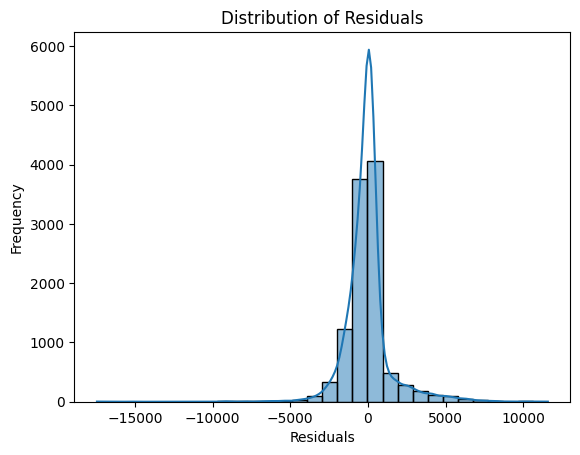

In [ ]:
#Q1 Write a Python script to visualize the distribution of errors (residuals) for multiple linear regression model using Seaborn's "diamond" dataset.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

diamonds = sns.load_dataset('diamonds')
df = diamonds [['carat', 'depth', 'table', 'x','y','z','price']].dropna()
x = df.drop(columns = ['price'])
y = df['price']
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
residuals = y_test - y_pred

sns.histplot(residuals, bins = 30, kde = True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()



In [ ]:
#Q2 Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 2242178.90
Mean Absolute Error: 888.48
Root Mean Squared Error: 1497.39


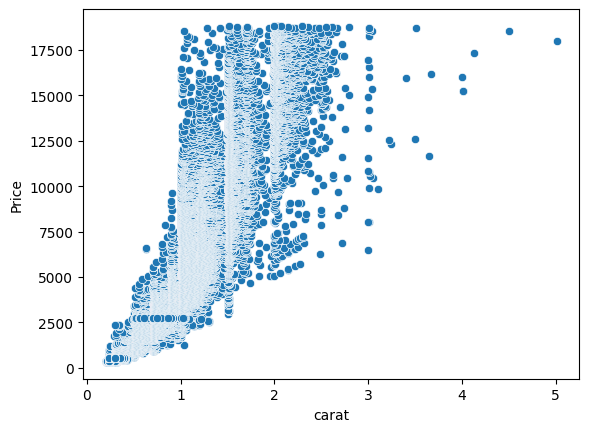

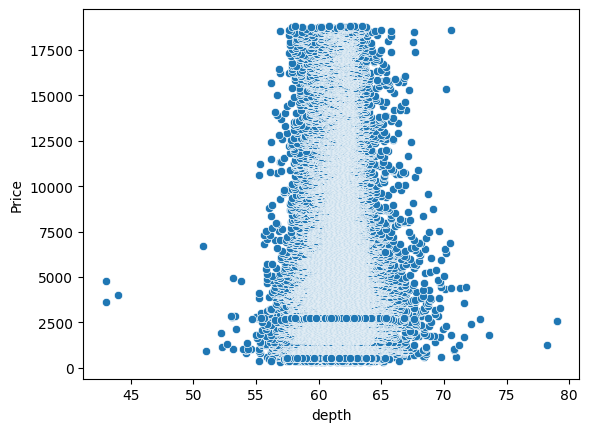

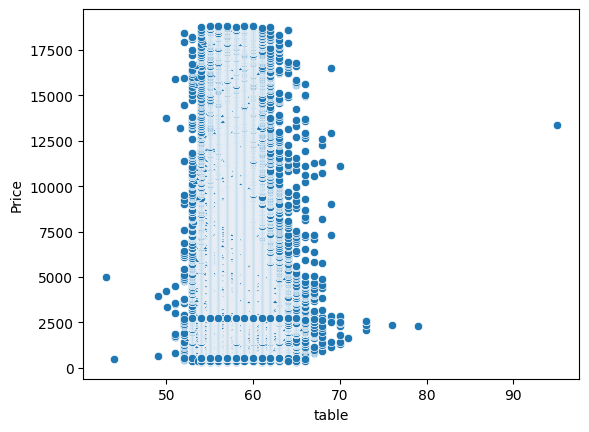

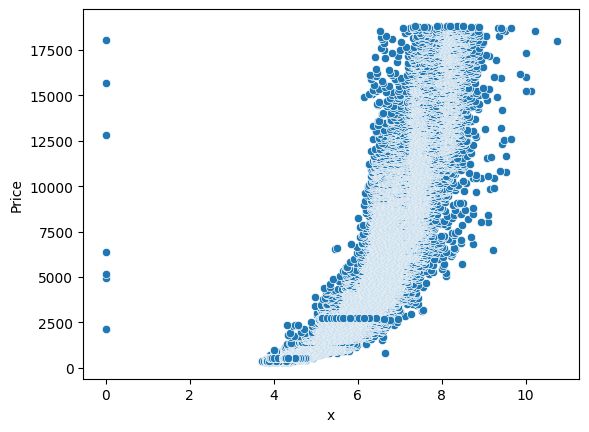

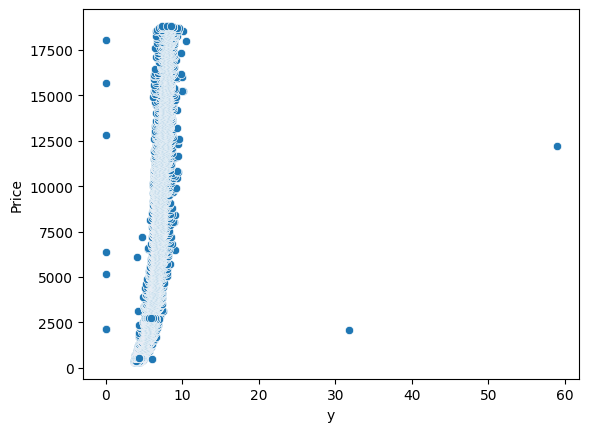

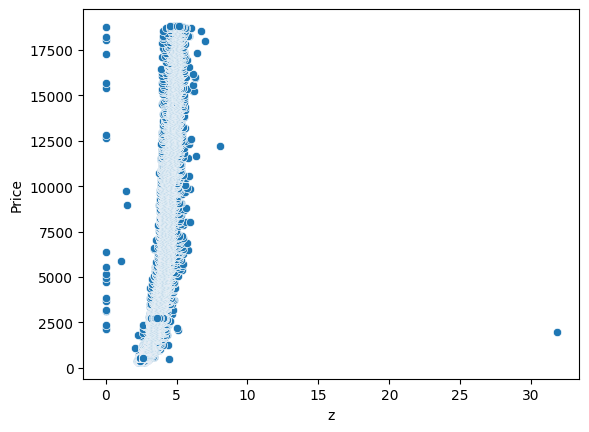

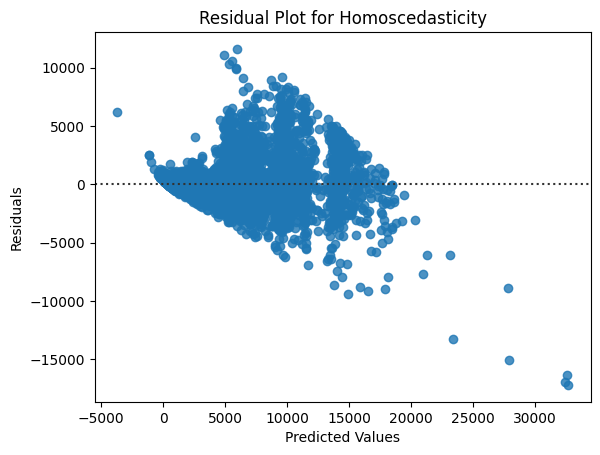

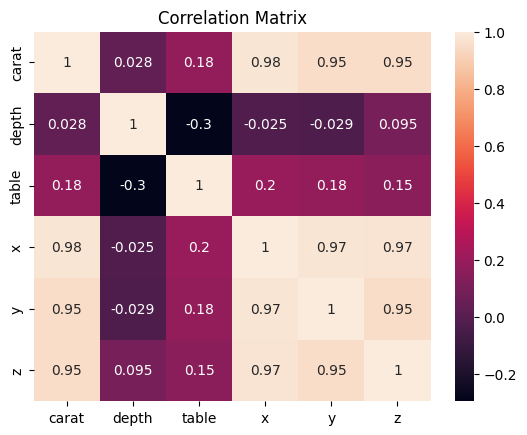

In [ ]:
#Q3 Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.
import seaborn as sns
import matplotlib.pyplot as plt
for col in x.columns:
    sns.scatterplot(x=x[col], y=y)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()
sns.residplot(x =y_pred, y = residuals, line_kws = {'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

np.corr_matrix = x.corr()
sns.heatmap(np.corr_matrix, annot = True)
plt.title( 'Correlation Matrix')
plt.show()

In [ ]:
#Q4 Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

diamonds = sns.load_dataset('diamonds')
df = diamonds [['carat', 'depth', 'table', 'x','y','z','price']].dropna()
x = df.drop(columns = ['price'])
y = df['price']

#Create a pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha = 1.0))])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
pipeline.fit(x_train , y_train)
y_pred_pipeline = pipeline.predict(x_test)
r2 = r2_score(y_test, y_pred_pipeline)
print(f"R-squared: {r2:.4f}")

R-squared: 0.8590


In [ ]:
#Q5 Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.
#Simple Linear Regression
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train[['carat']], y_train)
print(f"Coefficients: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared: {model.score(x_test[['carat']], y_test):.4f}")

Coefficients: 7768.910490360821
Intercept: -2261.9117456492177
R-squared: 0.8489


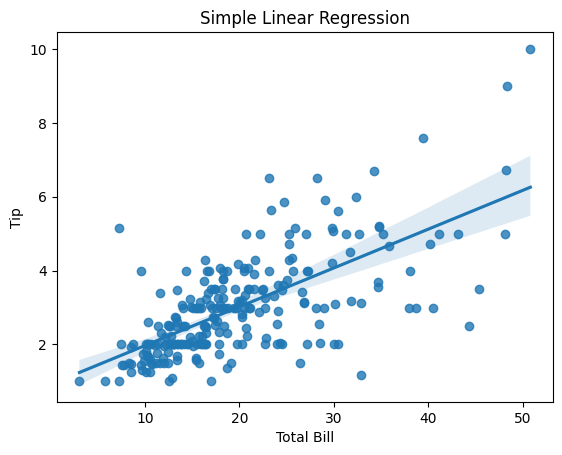

In [ ]:
#Q6 Write a Python script that analyzes the relationship between total bill and 'tips' dataset using simple linear regression and visualizes the results.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tips = sns.load_dataset('tips')
x = tips[['total_bill']]
y = tips['tip']
model = LinearRegression()
model.fit(x, y)
sns.regplot(x = 'total_bill', y = 'tip', data = tips)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression')
plt.show()

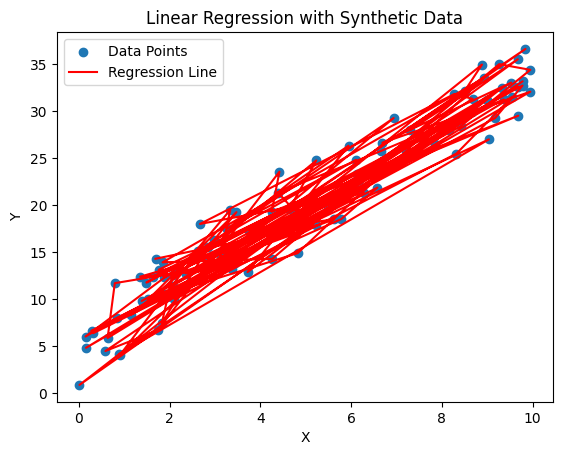

In [ ]:
#Q7 Write a Python script that fits a linear regresion model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x_syn = np.random.rand(100, 1) * 10
y_syn = 3 * x_syn.squeeze() + 5 + np.random.randn(100) * 2
model = LinearRegression()
model.fit(x_syn, y_syn)
plt.scatter(x_syn, y_syn, label='Data Points')
plt.plot( x_syn, y_syn, color='red', label='Regression Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Synthetic Data')
plt.show()

In [32]:
#Q8 Write a Python script that pickles a trained linear regression model and saves it to a file.
import pickle
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)
with open("linear_regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully.")


Model loaded successfully.


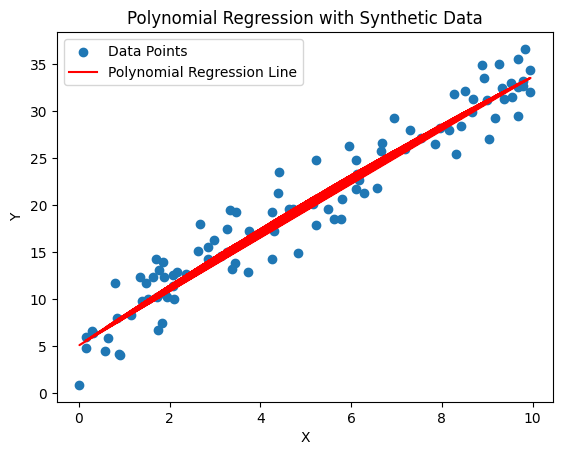

In [ ]:
#Q9 Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_syn)
model_poly = LinearRegression()
model_poly.fit(x_poly, y_syn)
y_pred_poly = model_poly.predict(x_poly)
plt.scatter(x_syn, y_syn, label = 'Data Points')
plt.plot(x_syn, y_pred_poly, color = 'red', label = 'Polynomial Regression Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression with Synthetic Data')
plt.show()

In [ ]:
#Q10 Generate synthetic data for simple linear regression (use random values for x and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.
x_syn = np.random.rand(100, 1) * 10
y_syn = 4 * x_syn.squeeze() + 6 + np.random.randn(100) * 3
model = LinearRegression()
model.fit(x_syn, y_syn)
print(f"Coefficients: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficients: 4.023409788336204
Intercept: 5.636952886286661


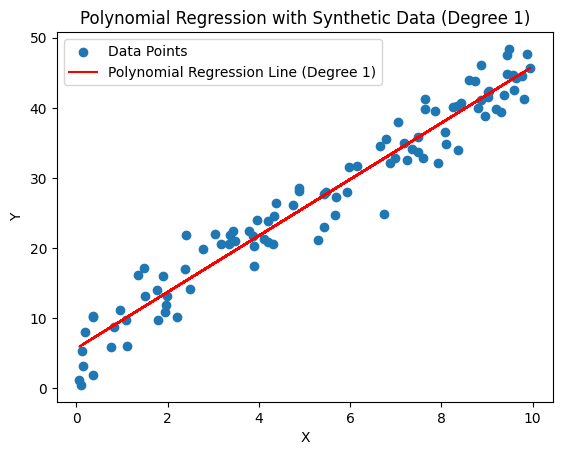

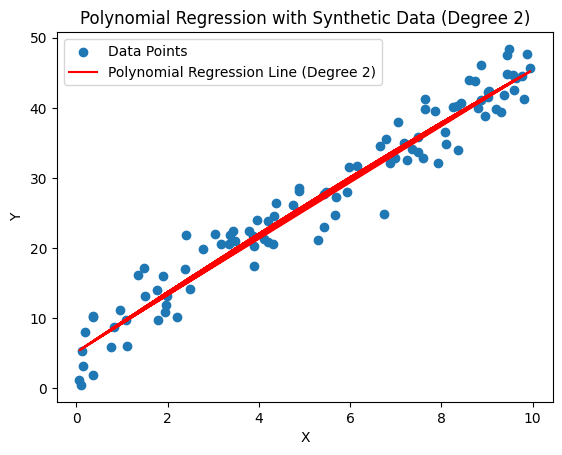

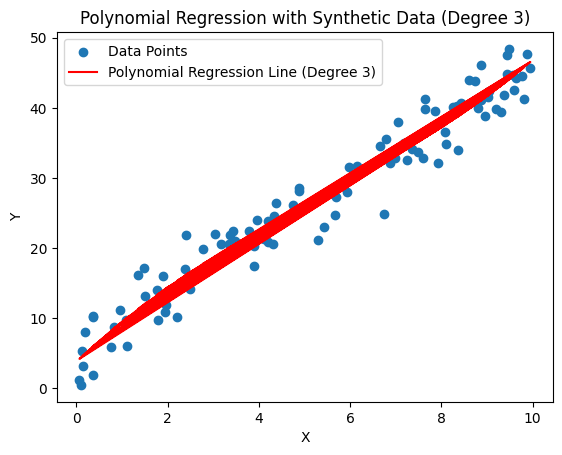

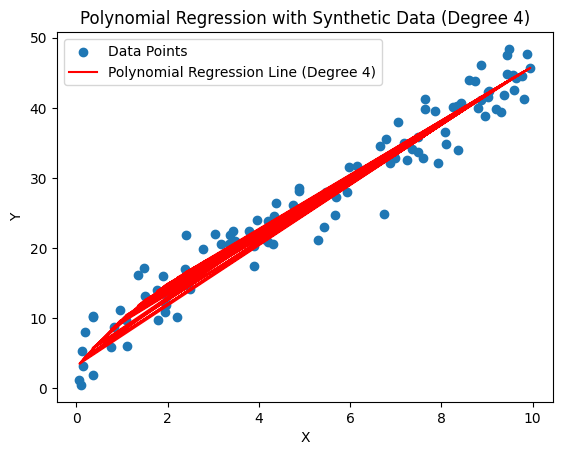

In [ ]:
#Q11 Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performances.
degrees = [1,2,3,4]
for d in degrees:
    poly = PolynomialFeatures(degree = d)
    x_poly = poly.fit_transform(x_syn)
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y_syn)
    y_pred_poly = model_poly.predict(x_poly)
    plt.scatter(x_syn, y_syn, label = 'Data Points')
    plt.plot(x_syn, y_pred_poly, color = 'red', label = f'Polynomial Regression Line (Degree {d})')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polynomial Regression with Synthetic Data (Degree {d})')
    plt.show()

In [ ]:
#Q12 Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, ans R- squared score.
x_two = diamonds[['carat','depth']]
y_two = diamonds['price']
model.fit(x_two, y_two)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-Squared Score: {model.score(x_two, y_two):.4f}")

Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826016815
R-Squared Score: 0.8507


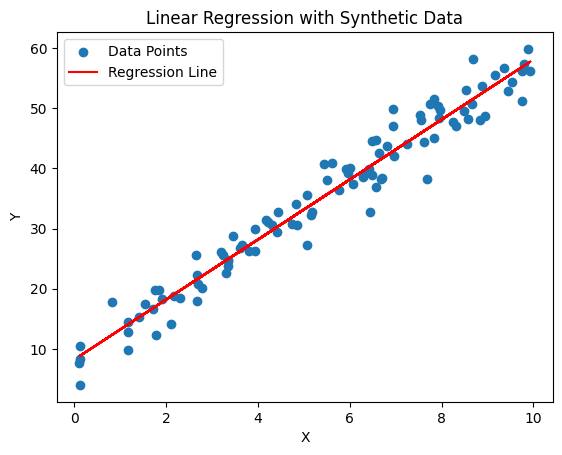

In [ ]:
#Q13 Write a Python script that generates synthetic data, fits a linear regression model, and visualize the regression line along with the data points.
x_syn = np.random.rand(100, 1) * 10
y_syn = 5 * x_syn.squeeze() + 8 + np.random.randn(100) * 3
model = LinearRegression()
model.fit(x_syn, y_syn)
y_pred = model.predict(x_syn)
plt.scatter(x_syn, y_syn, label = 'Data Points')
plt.plot(x_syn, y_pred, color = 'red', label = 'Regression Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Synthetic Data')
plt.show()

In [ ]:
#Q14 Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
x = pd.DataFrame(np.random.rand(100,5),columns= ['A','B','C','D','E'])
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x_scaled, i )for i in range (x.shape [1])]
print(vif_data)


  Feature       VIF
0       A  1.083899
1       B  1.054241
2       C  1.078543
3       D  1.081226
4       E  1.084014


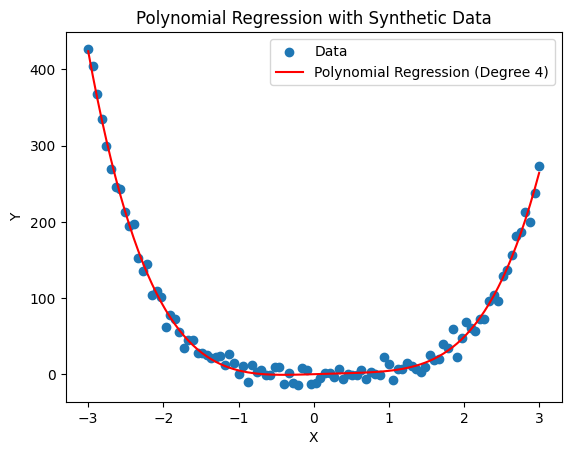

In [33]:
#Q15 Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x_syn = np.linspace(-3, 3, 100).reshape(-1,1)
y_syn = 4* x_syn ** 4 -3 * x_syn **3 + 2 * x_syn ** 2 + x_syn+ np.random.randn(100,1)*10

poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x_syn)
model = LinearRegression()
model.fit(x_poly,y_syn)

y_pred = model.predict(x_poly)

plt.scatter(x_syn, y_syn, label = "Data")
plt.plot(x_syn, y_pred, color = 'red', label= "Polynomial Regression (Degree 4)" )
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression with Synthetic Data')
plt.legend()
plt.show()



In [28]:
#Q16 Write a Python script that creates a machine learning pipeline with data standadization and a multiple linear regression model, and prints the R-squared score.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

x = pd.DataFrame(np.random.rand(100, 5), columns= ['A','B','C','D','E'])

pipeline = Pipeline([('scaler', StandardScaler()),('regression', LinearRegression())])

pipeline.fit(x,y_syn)
y_pred = pipeline.predict(x)
print(f"R-squared Score : {r2_score(y_syn,y_pred):.4f}")


R-squared Score : 0.0373


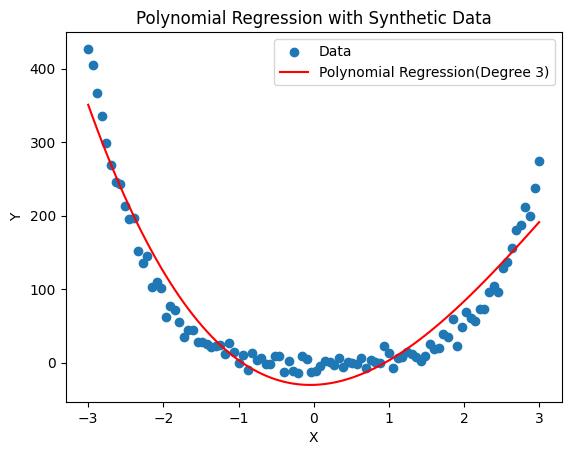

In [34]:
#Q17 Write a Python script that performs polynomial regression (degree 3 ) on a synthetic dataset and plots the regression curve.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_syn)
model = LinearRegression()
model.fit(x_poly,y_syn)

y_pred = model.predict(x_poly)
plt.scatter(x_syn, y_syn,label= "Data")
plt.plot(x_syn, y_pred, color='red', label = "Polynomial Regression(Degree 3)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression with Synthetic Data')
plt.legend()
plt.show()




In [15]:
#Q18 Write a Python script that performs multiple linear regression on a synthetic dataset with 5 feature. Print the R-squared score and model coefficients.
x_multi = np.random.rand(100, 5)
y_multi = 3* x_multi[:, 0 ] +2 * x_multi [:,1] - 1.5 * x_multi[:,2] + np.random.randn(100)* 0.5
model = LinearRegression()
model.fit(x_multi, y_multi)
print(f"R-squared Score: {model.score(x_multi, y_multi):.4f}")
print(f"Model Coefficients: {model.coef_}")

R-squared Score: 0.8545
Model Coefficients: [ 2.7282211   1.95299903 -1.64704013  0.06307432 -0.0973697 ]


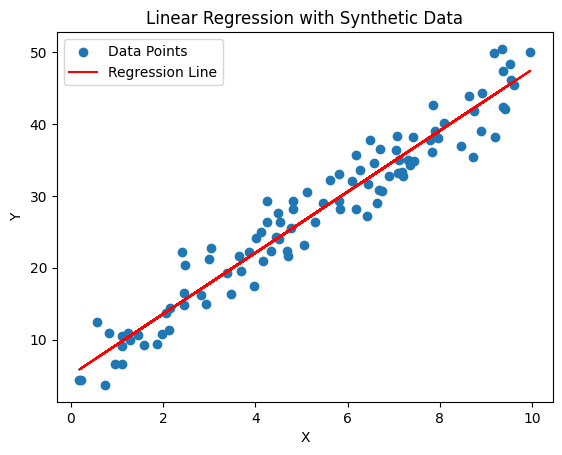

In [16]:
#Q19 Write a Python script that generates synthetic data for linear regression, fits a model,and visualizes the data points along with the regression line.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_syn = np.random.rand(100,1 ) * 10
y_syn = 4 * x_syn.squeeze() + 6 + np.random.randn(100) * 3
model = LinearRegression()
model.fit(x_syn, y_syn)
y_pred = model.predict(x_syn)
plt.scatter(x_syn, y_syn, label = 'Data Points')
plt.plot(x_syn, y_pred, color = 'red', label = 'Regression Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Synthetic Data')
plt.show()





In [17]:
#Q20 Create a synthetic dataset with 3 features and perform multiple linear regression .Print the model's R-squared score and coefficients.
x_three = np.random.rand(100,3)
y_three = 4 * x_three[:,0] + 2 * x_three[:,1] +3 * x_three[:,2] + np.random.randn(100) * 2
model.fit(x_three , y_three)
print(f"R-squared Score : {model.score(x_three, y_three):.4f}")
print(f"Coefficients: {model.coef_}")

R-squared Score : 0.3289
Coefficients: [4.20323595 1.85139621 1.88482765]


In [19]:
#Q21 Write a Python script that demonstrates how to serialize and deserialize machine learning models using jobib instead of pickling.
import joblib
joblib.dump(model,"linear_model.joblib")
loaded_model = joblib.load("linear_model.joblib")
print("Model loaded successfully.")

Model loaded successfully.


In [23]:
#Q22 Write a Python script to perform linear regression with categorical features using one-hot encoding.Use the Seaborn 'tips' datadet.
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
tips = sns.load_dataset('tips')
preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder (drop ='first'),['sex','smoker','day','time'])],remainder = 'passthrough')
x = tips[['sex','smoker','day','time','total_bill']]
y = tips['tip']
x_encoded = preprocessor.fit_transform(x)
model = LinearRegression()
model.fit(x_encoded, y)
print(f"R-squared Score:{model.score(x_encoded,y):.4f}")

R-squared Score:0.4614


In [27]:
#Q23 Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R - squared score.
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)
ridge.fit(x_multi,y_multi)
model.fit(x_multi, y_multi)
print(f"Linear Regression: {model.score(x_multi, y_multi):.4f}")
print(f"Ridge Regression: {ridge.score(x_multi, y_multi):.4f}")


Linear Regression: 0.8545
Ridge Regression: 0.8466


In [29]:
#Q24 Write a Python script that uses cross- validation to evaluate a Linear Regression model on a synthetic dataset.
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x_multi, y_multi, cv = 5, scoring='r2')
print(f"Cross-Validation R-square Scores: {cv_scores}")
print(f"Mean R-square Score: {np.mean(cv_scores):.4f}")


Cross-Validation R-square Scores: [0.63680567 0.87280007 0.8437472  0.88829351 0.87215656]
Mean R-square Score: 0.8228


In [31]:
#Q25 Write a Python script that compares polynomial regression models of different degrees and prints the R- squared score for each.
degrees = [ 1, 2, 3, 4, 5 ]
for d in degrees:
    poly = PolynomialFeatures(degree = d)
    x_poly = poly.fit_transform(x_syn)
    model.fit(x_poly,y_syn)
    r2 = model.score(x_poly, y_syn)
    print(f"degree {d} Polynomial Regression R-square Score: {r2:.4f}")


degree 1 Polynomial Regression R-square Score: 0.9390
degree 2 Polynomial Regression R-square Score: 0.9393
degree 3 Polynomial Regression R-square Score: 0.9407
degree 4 Polynomial Regression R-square Score: 0.9418
degree 5 Polynomial Regression R-square Score: 0.9419
